# 3.4.5 Гистерезис  
---

In [190]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
from sys import *


In [191]:
r_0 = 0.22     # om
r_i = 20 * 1e3 # om
tau = 0.4
mu_0 = 4 * 3.142 * 10**-7

Kx and Ky


In [192]:
k_x = 2 * 0.22 * m.sqrt(2) * 1.3 / 42
k_x

0.01926024184946215

In [193]:
k_y = 2 * m.sqrt(2) * 149 * 1e-3 / 23
k_y

0.018323288764660103

In [194]:
def get_maxxxxxxx(N_0, l, S, N_i, n1, n2):
  print(n1 * 0.02 / r_0 * N_0 / l, n2 * 0.4 * 0.02 / (S * 10**-4) / N_i)

феррит

In [195]:
H_max = 0.020 * 42 / 0.25 * 25
B_max = 0.4 / (3 * 0.0001 * 400) * 0.020 * 12.5
H_max, B_max

(84.0, 0.8333333333333334)

In [196]:
get_maxxxxxxx(42, 0.25, 3, 400, 25, 12.5)

381.81818181818187 0.8333333333333333


In [197]:
14.5 * 25

362.5

In [198]:
def get_point(X_d, Y_d, k, material):
  if material == "ferrit":
    N_0 = 42
    N_i = 400
    S = 3 * 1e-4
    l = 0.25
  elif material == "feni":
    N_0 = 200
    N_i = 300
    S = 0.76 * 1e-4
    l = 0.133
  elif material == "fesi":
    N_0 = 20
    N_i = 200
    S = 2 * 1e-4
    l = 0.11

  k_h = k * N_0 / r_0 / l
  k_b = k * tau / S / N_i

  return (k_h * X_d / 2, k_b * Y_d / 2)


In [199]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

Амплитуда насыщения

In [200]:
get_point(50, 25, 0.02, "ferrit")

(381.8181818181818, 0.8333333333333334)

In [201]:
get_point(43, 12, .01, "feni")

(1469.583048530417, 1.0526315789473684)

In [202]:
get_point(48, 14, .05, "fesi")

(991.7355371900827, 3.500000000000001)

Коэрцитивные 

In [203]:
get_point(11, 10, 0.02, "ferrit")

(84.0, 0.3333333333333333)

In [204]:
get_point(6, 9, 0.01, "feni")

(205.05809979494194, 0.7894736842105263)

In [205]:
get_point(14, 7, 0.05, "fesi")

(289.25619834710744, 1.7500000000000004)

In [206]:
ferrit_raw_1 = [(50, 25), (46, 24), (42, 22), (34, 20), (23,18), (19, 12)]
ferrit_raw_2 = [(46, 30), (42, 20)]

ferrit_ = [get_point(i[0], i[1], 0.02, "ferrit") for i in ferrit_raw_1]
for i in ferrit_raw_2:
  ferrit_.append(get_point(i[0], i[1], 0.005, "ferrit"))

ferrit = []
for i in ferrit_:
  ferrit.append((-i[0], -i[1]))
  ferrit.append(i)

/tmp/ipykernel_1471/979469106.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


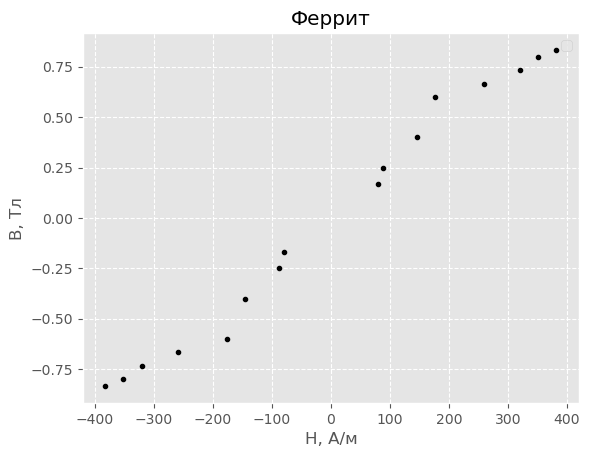

In [207]:
# plt.style.use('ggplot')
plt.figure()
plt.title("Феррит")
plt.xlabel("H, А/м")
plt.ylabel("B, Тл")

plt.grid(True, linestyle="--")
plt.errorbar([i[0] for i in ferrit], [i[1] for i in ferrit], fmt=".k")

plt.legend()
plt.show()

In [208]:
k, b, t, t1 = LeastSquares([i[0] for i in ferrit[-4:]], [i[1] for i in ferrit[-4:]])
print("конечная мю диф = ", k / mu_0)


конечная мю диф =  1987.2258194752894


In [209]:
k, b, t, t1 = LeastSquares([i[0] for i in ferrit[4:12]], [i[1] for i in ferrit[4:12]])
print("max мю диф = ", k / mu_0)

max мю диф =  2047.4379488899556


In [210]:
feni_raw_1 = [(43, 12), (38, 11), (34, 11), (30, 10), (20, 10)]
feni_raw_2 = [(19, 19), (11, 19), (7, 16)]

feni_ = [get_point(i[0], i[1], 0.01, "feni") for i in feni_raw_1]
for i in feni_raw_2:
  feni_.append(get_point(i[0], i[1], 0.005, "feni"))

feni = []
for i in feni_:
  feni.append((-i[0], -i[1]))
  feni.append(i)

/tmp/ipykernel_1471/3171148134.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


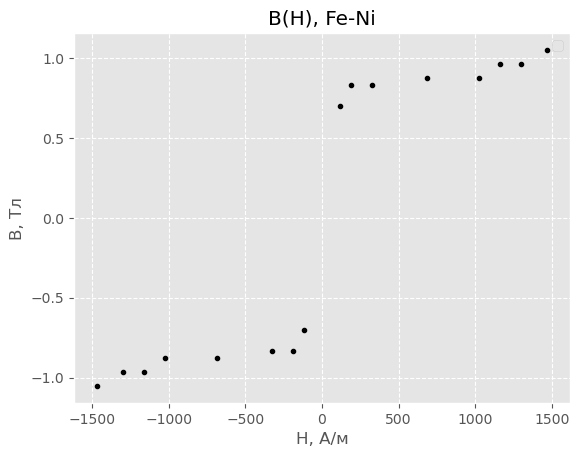

In [211]:
#plt.style.use('ggplot')
plt.figure()
plt.title("B(H), Fe-Ni")
plt.xlabel("H, А/м")
plt.ylabel("B, Тл")

plt.grid(True, linestyle="--")
plt.errorbar([i[0] for i in feni], [i[1] for i in feni], fmt=".k")

plt.legend()
plt.show()

feni = feni[0:9]

In [212]:
k, b, t, t1 = LeastSquares([i[0] for i in feni[4:]], [i[1] for i in feni[4:]])
print("конечная мю диф = ", k / mu_0)

конечная мю диф =  694.8721218903698


In [213]:
k, b, t, t1 = LeastSquares([i[0] for i in feni[:4]], [i[1] for i in feni[:4]])
print("max мю диф = ", k / mu_0)

max мю диф =  579.2398653883859


In [214]:
fesi_raw_1 = [(48, 14), (41, 12), (31, 10), (20, 8)]
fesi_raw_2 = [(42, 16), (31, 11), (28, 9), (12, 4)]

fesi_ = [get_point(i[0], i[1], 0.05, "fesi") for i in fesi_raw_1]
for i in fesi_raw_2:
  fesi_.append(get_point(i[0], i[1], 0.02, "fesi"))

fesi = []
for i in fesi_:
  fesi.append((-i[0], -i[1]))
  fesi.append(i)

/tmp/ipykernel_1471/1225608693.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


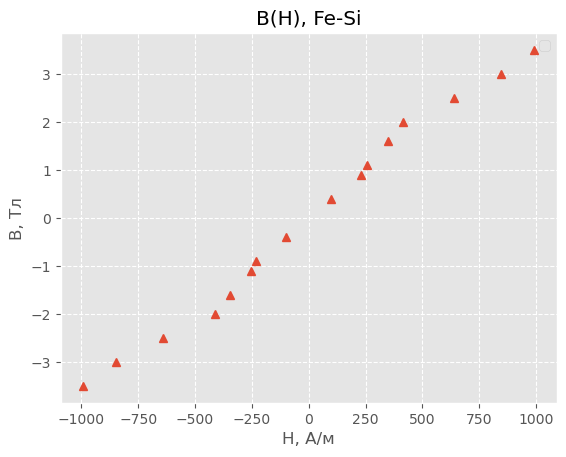

In [215]:
# plt.style.use('ggplot')
plt.figure()
plt.title("B(H), Fe-Si")
plt.xlabel("H, А/м")
plt.ylabel("B, Тл")

plt.grid(True, linestyle="--")
plt.errorbar([i[0] for i in fesi], [i[1] for i in fesi], fmt="^")

plt.legend()
plt.show()